In [159]:
%matplotlib inline
import csv
import pandas as pd
import os

DATA_CSVS = ['/home/jay/Self-Driving-RC-Data/recorded-2017-06-09/original-recorded.csv']
SAVE_FILE_TO = '/home/jay/Self-Driving-RC-Data/recorded-2017-06-09'

In [150]:
df = pd.DataFrame()
list_ = []
for file_ in DATA_CSVS:
    df = pd.read_csv(file_,index_col=None, header=0, engine='python')
    list_.append(df)
df = pd.concat(list_)
df.columns = df.columns.str.strip()
df

,filename,steer,speed,rec_latency
0,2017-06-09_10-01-28.980753.jpg,473,122,0.332057
1,2017-06-09_10-01-29.281891.jpg,473,0,0.093937
2,2017-06-09_10-01-29.761791.jpg,473,0,0.004200
3,2017-06-09_10-01-30.241556.jpg,450,255,0.003850
4,2017-06-09_10-01-30.690293.jpg,422,227,0.003870
5,2017-06-09_10-01-31.164998.jpg,623,57,0.003581
6,2017-06-09_10-01-31.629508.jpg,520,223,0.003628
7,2017-06-09_10-01-32.088452.jpg,596,70,0.003865
8,2017-06-09_10-01-32.547481.jpg,594,77,0.003338
9,2017-06-09_10-01-33.017107.jpg,472,94,0.003460


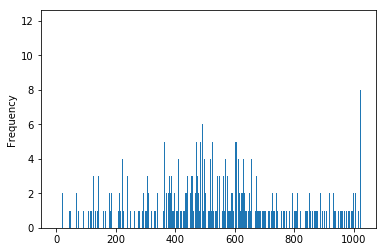

In [151]:
_ = df['steer'].plot.hist(bins=1024)

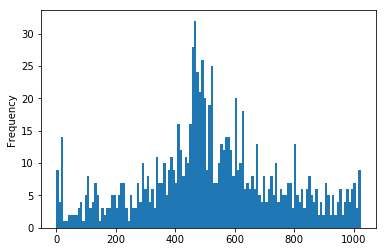

In [152]:
_ = df['steer'].plot.hist(bins=128)

## Crop

Most steering angle is in the center. Let's try to remove some of the data.

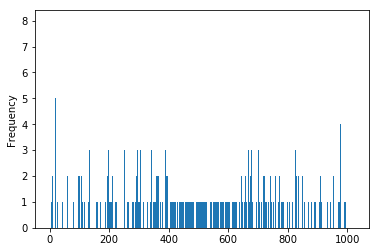

In [153]:
# Limit number of samples to 2 for each steering angle.
angles = [0]*1024
df_crop = df.copy()
for i, row in enumerate(df['steer']):
    if angles[row] >= 1 and row > 400 and row < 630:
        df_crop = df_crop.drop([i])
    angles[row] += 1
_ = df_crop['steer'].plot.hist(bins=1024)

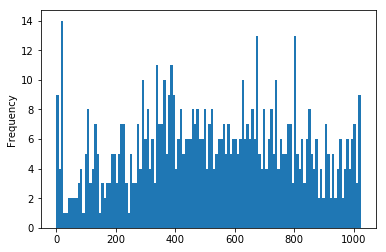

In [154]:
_ = df_crop['steer'].plot.hist(bins=128)

In [161]:
df_crop.to_csv(os.path.join(SAVE_FILE_TO,'cropped.csv'))

## Duplicate

How about duplicating some data instead?

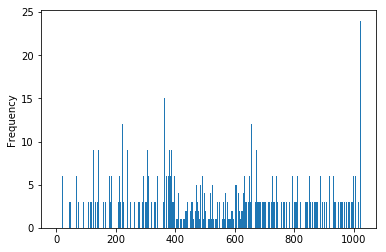

In [144]:
df_dup = df.copy()
for i, row in df.iterrows():
    if row['steer'] < 400 or row['steer'] > 630:
        df_dup.loc[df_dup.size] = row
        df_dup.loc[df_dup.size] = row
_ = df_dup['steer'].plot.hist(bins=1024)

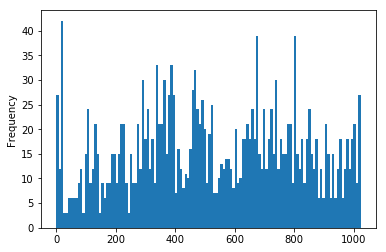

In [145]:
_ = df_dup['steer'].plot.hist(bins=128)

In [162]:
df_dup.to_csv(os.path.join(SAVE_FILE_TO,'duplicated.csv'))